In [31]:

import sqlite3 as sql
import pandas as pd
import numpy as np
import networkx as nx

import itertools

import matplotlib.pyplot as plt
import plotly.express as px

In [32]:
### Define the path to the file (a string in a variable 'db_file')
db_file = '../database/cortona_week.db'

In [33]:
### Créer une connexion vers la base de données
# Attention: si la base de données n'existe pas, elle est créée à l'endroit indiqué.
# Ce qui est une manière de la créer si souhaité
try:
    cn = sql.connect(db_file)
except Exception as e:
    print(e)    
# Le contenu de la variable: connexion
# cn

In [70]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q_connection = """
SELECT 
	c.fk_person_source,
    c.fk_person_target
FROM
	Connection c  
"""
q_participation = """
SELECT 
	p.fk_person,
    p.fk_event
FROM
	Participation p  
"""
q_publishing = """
SELECT 
	p2.fk_person,
    p2.fk_publication
FROM
	Publishing p2  
"""
q_pursuit = """
SELECT 
	p3.fk_person,
    p3.fk_organization,
    o1.name
FROM
	Pursuit p3
JOIN
	Organization o1 
ON
	o1.pk_organization = p3.fk_organization 
"""
q_presentation = """
SELECT 
	p4.fk_person,
    p4.fk_workshop
FROM
	Presentation p4   
"""

q_study = """
SELECT 
	s.fk_person,
    s.fk_organization,
    o1.name
FROM
	Study s  
JOIN
	Organization o1 
ON
	o1.pk_organization = s.fk_organization 
"""

In [71]:
### Création du conteneur du résultat de la requête
cur = cn.cursor()
cur

In [72]:
### Exécuter la requête et récupérer le résultat
cur.execute(q_connection)
# La méthode 'fetchall' permet de récupérer toutes les lignes
data_connection = cur.fetchall()

cur.execute(q_participation)
# La méthode 'fetchall' permet de récupérer toutes les lignes
data_participation = cur.fetchall()

cur.execute(q_presentation)
# La méthode 'fetchall' permet de récupérer toutes les lignes
data_presentation = cur.fetchall()

cur.execute(q_publishing)
# La méthode 'fetchall' permet de récupérer toutes les lignes
data_publishing = cur.fetchall()

cur.execute(q_pursuit)
# La méthode 'fetchall' permet de récupérer toutes les lignes
data_pursuit = cur.fetchall()

cur.execute(q_study)
# La méthode 'fetchall' permet de récupérer toutes les lignes
data_study = cur.fetchall()

In [73]:
### Inspecter le résultat:
# longueur, type du résultat et premières lignes du résultat
# On observe qu'il y a des trous et des répétitions:
# plusieurs personnes on la même année de naissance
print(len(data_connection), '\n-----\n', type(data_connection),  '\n-----\n', data_connection[:5])


print(len(data_participation), '\n-----\n', type(data_participation),  '\n-----\n', data_participation[:5])


print(len(data_presentation), '\n-----\n', type(data_presentation),  '\n-----\n', data_presentation[:5])


print(len(data_publishing), '\n-----\n', type(data_publishing),  '\n-----\n', data_publishing[:5])

print(len(data_pursuit), '\n-----\n', type(data_pursuit),  '\n-----\n', data_pursuit[:5])


62 
-----
 <class 'list'> 
-----
 [(198, 201), (203, 74), (87, 81), (51, 34), (16, 90)]
504 
-----
 <class 'list'> 
-----
 [(1, 11), (1, 11), (2, 11), (3, 11), (4, 11)]
100 
-----
 <class 'list'> 
-----
 [(1, 1), (3, 2), (2, 2), (4, 8), (4, 7)]
136 
-----
 <class 'list'> 
-----
 [(1, 1), (6, 1), (79, 2), (79, 3), (79, 4)]
193 
-----
 <class 'list'> 
-----
 [(61, 49, 'Indian Administrative Service'), (61, 11, 'Auroville'), (79, 13, 'Department of History, University of Victoria'), (33, 15, 'Birbeck College'), (80, 1, 'ETH Zürich')]


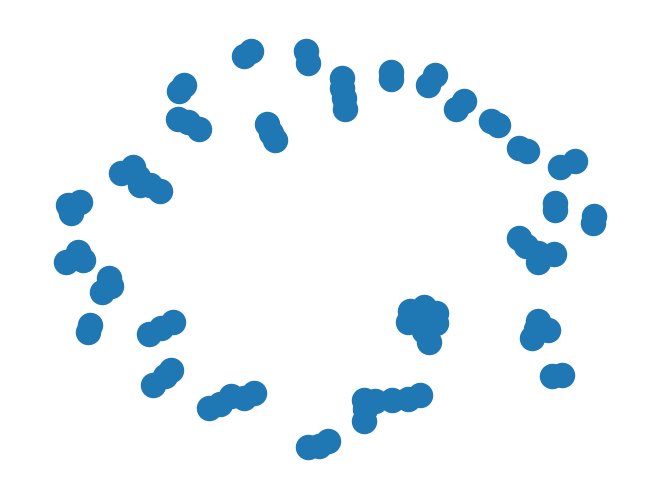

In [74]:
### create a panda data frame of data connection
pd_adj_data_connection=pd.DataFrame(data_connection, columns=['source','target'])

g=nx.from_pandas_edgelist(pd_adj_data_connection)
nx.draw(g)             
pd_adj_data_connection.to_csv('cortona_connection_test.csv', index=False) 

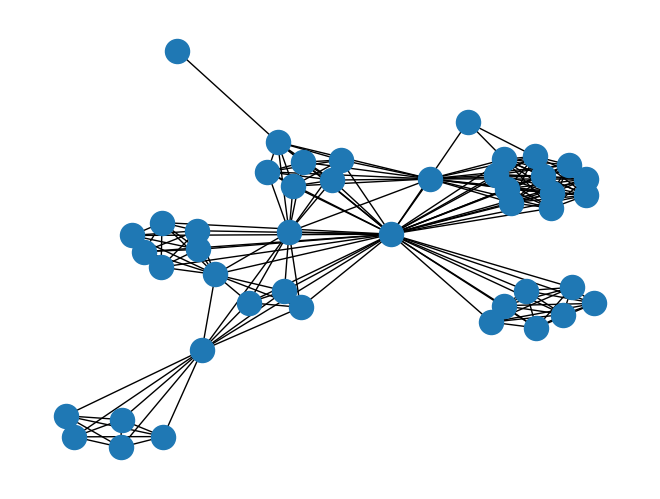

In [55]:
### create a panda data frame of data partipcipation
panda_data_participation=pd.DataFrame(data_participation, columns=['pk_person',  'pk_event'])
#print(panda_data_participation['pk_event'])
adj_data_participation=[]
for i in range(30,max(panda_data_participation['pk_event'])):
 #   print(i)
    temp_all_persons=pd.unique(panda_data_participation[panda_data_participation['pk_event'] == i]['pk_person'])
    if len(temp_all_persons) > 0:
        temp_permutations=list(itertools.combinations(temp_all_persons, 2))
        adj_data_participation.extend(temp_permutations)


#print(adj_data_participation)
pd_adj_data_participation=pd.DataFrame(adj_data_participation,columns=['source',  'target'])
#print(adj_data_participation)

pd_adj_data_participation=pd_adj_data_participation.astype('int')
#print(adj_data_participation)
g=nx.from_pandas_edgelist(pd_adj_data_participation)
nx.draw(g)
pd_adj_data_participation.to_csv('cortona_participation_test.csv', index=False) 

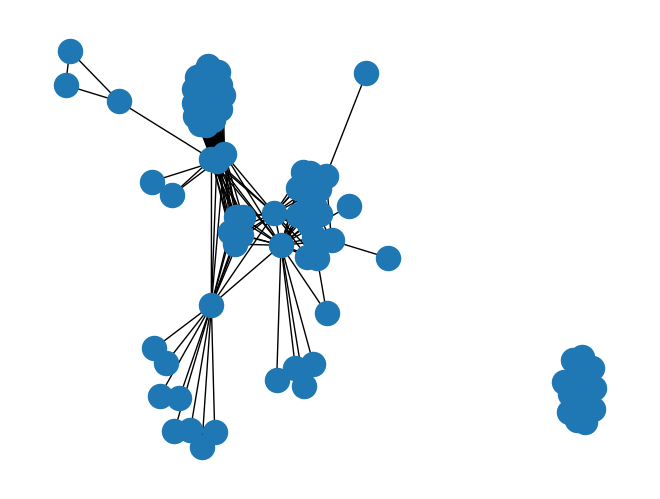

In [56]:
### create a dataframe from publishing data
panda_data_publishing=pd.DataFrame(data_publishing, columns=['pk_person',  'pk_publication'])
#print(panda_data_participation['pk_event'])
adj_data_publishing=[]
for i in range(0,max(panda_data_publishing['pk_publication'])):
 #   print(i)
    temp_all_persons=pd.unique(panda_data_publishing[panda_data_publishing['pk_publication'] == i]['pk_person'])
    if len(temp_all_persons) > 0:
        temp_permutations=list(itertools.combinations(temp_all_persons, 2))
        adj_data_publishing.extend(temp_permutations)


#print(adj_data_participation)
pd_adj_data_publishing=pd.DataFrame(adj_data_publishing,columns=['source',  'target'])
#print(adj_data_participation)

pd_adj_data_publishing=pd_adj_data_publishing.astype('int')
#print(adj_data_participation)
g=nx.from_pandas_edgelist(pd_adj_data_publishing)
nx.draw(g)
pd_adj_data_publishing.to_csv('cortona_publishing_test.csv', index=False) 

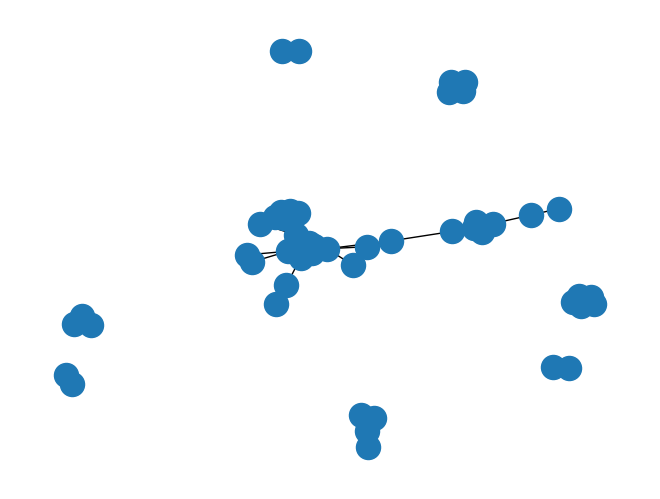

In [57]:
### create a dataframe from pursuit data
panda_data_pursuit=pd.DataFrame(data_pursuit, columns=['pk_person',  'pk_organization'])

panda_data_pursuit=panda_data_pursuit[panda_data_pursuit['pk_organization'].notna()]

#print(panda_data_participation['pk_event'])
panda_data_pursuit=panda_data_pursuit.astype('int')
adj_data_pursuit=[]
for i in range(0,max(panda_data_pursuit['pk_organization'])):
 #   print(i)
    temp_all_persons=pd.unique(panda_data_pursuit[panda_data_pursuit['pk_organization'] == i]['pk_person'])
    if len(temp_all_persons) > 0:
        temp_permutations=list(itertools.combinations(temp_all_persons, 2))
        adj_data_pursuit.extend(temp_permutations)


#print(adj_data_participation)
pd_adj_data_pursuit=pd.DataFrame(adj_data_pursuit,columns=['source',  'target'])
#print(adj_data_participation)

pd_adj_data_pursuit=pd_adj_data_pursuit.astype('int')
#print(adj_data_participation)
g=nx.from_pandas_edgelist(pd_adj_data_pursuit)
nx.draw(g)
pd_adj_data_pursuit.to_csv('cortona_pursuit_test.csv', index=False) 

In [80]:
### create dataframe from study data

panda_data_study=pd.DataFrame(data_study, columns=['pk_person',  'pk_organization','name'])
print(panda_data_study)
panda_data_study=panda_data_study[panda_data_study['pk_organization'].notna()]
print(panda_data_study)
#print(panda_data_participation['pk_event'])

#panda_data_study=panda_data_study.astype('int')

adj_data_study=[]
for i in range(0,max(panda_data_study['pk_organization'])):
 #   print(i)
    temp_all_persons=pd.unique(panda_data_study[panda_data_study['pk_organization'] == i]['pk_person'])
    if len(temp_all_persons) > 0:
        temp_permutations=list(itertools.combinations(temp_all_persons, 2))
        adj_data_study.extend(temp_permutations)


print(adj_data_study)
pd_adj_data_study=pd.DataFrame(adj_data_study,columns=['source',  'target'])
print(pd_adj_data_study)

#pd_adj_data_study=pd_adj_data_study.astype('int')
#print(adj_data_participation)
#g=nx.from_pandas_edgelist(pd_adj_data_study)
#nx.draw(g)

    pk_person  pk_organization                                        name
0          79               12                    Johns Hopkins University
1          33               16          University of California, Berkeley
2          80               17                           Universität Basel
3          81               56  Zoologisches Museum der Universität Zürich
4          82                7                          Universität Zürich
..        ...              ...                                         ...
91        326              118                      Universität Heidelberg
92        325                7                          Universität Zürich
93        327              160   Nationala Autonomous University of Mexico
94        330                1                                  ETH Zürich
95        332              164                        Rochester University

[96 rows x 3 columns]
    pk_person  pk_organization                                        name
0 

In [59]:
### create a combined dataframe



full_dataframe=pd.concat([pd_adj_data_connection, pd_adj_data_participation,
                         pd_adj_data_publishing, pd_adj_data_pursuit, pd_adj_data_study])

###remove persons that were not at cortona
panda_data_participation=pd.DataFrame(data_participation, columns=['pk_person',  'pk_event'])
#print(panda_data_participation['pk_event'])
list_of_persons_at_cortona=[]
for i in range(0,29):
 #   print(i)
    temp_all_persons=pd.unique(panda_data_participation[panda_data_participation['pk_event'] == i]['pk_person'])
    if len(temp_all_persons) > 0:
        list_of_persons_at_cortona.extend(temp_all_persons)


list_of_persons_at_cortona=pd.unique(list_of_persons_at_cortona)

list_of_persons_at_cortona= list_of_persons_at_cortona[~np.isnan(list_of_persons_at_cortona)]
print(list_of_persons_at_cortona)
mask = full_dataframe['source'].isin(list_of_persons_at_cortona) & full_dataframe['target'].isin(list_of_persons_at_cortona)
full_dataframe = full_dataframe[mask]




[  1.  96.  97.  84.  93.  95.  94.  61.  33.  74.  75.  76.  51.  34.
  77.  78.  79.  80.  81.  82.  83.  85.  86.  87.  88.  90.  50.  89.
  91.  39.  19.  92. 123.  98.  25.  99. 109. 101. 102. 103. 104. 105.
 106. 100. 107.  24.  16. 108. 110. 111. 112. 113. 114. 115. 116. 117.
 118. 120. 124. 119. 121. 122. 135. 136. 137. 138. 142. 144. 132. 146.
 141. 126. 140.  27. 139. 143.  72. 125. 127. 128. 129. 130. 133. 134.
 169. 170. 154. 158. 168. 166. 167. 171. 147. 148. 149. 150. 151. 152.
 153. 155. 156. 157. 159. 160. 161. 162. 163. 164. 174. 172. 173. 175.
 194. 176. 177. 178. 179. 180. 181. 182. 165. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193.  18. 296.  52. 297. 298. 299.  13. 300.
 301. 302. 303. 304. 305.  22. 306. 307. 308. 309. 310. 311. 312. 313.
 318. 333. 315.   7. 335. 323. 324. 326. 325. 328. 331. 332. 336. 337.
 321. 334. 320.  30. 338. 322. 329.   2.   3.   4.   5.   6.   8.   9.
  10.  11.  12.  14.  15.  17.  20.  21.  23.  26.  28.  29.  31.  32.
  58. 

/tmp/ipykernel_121/624059655.py:19: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  list_of_persons_at_cortona=pd.unique(list_of_persons_at_cortona)


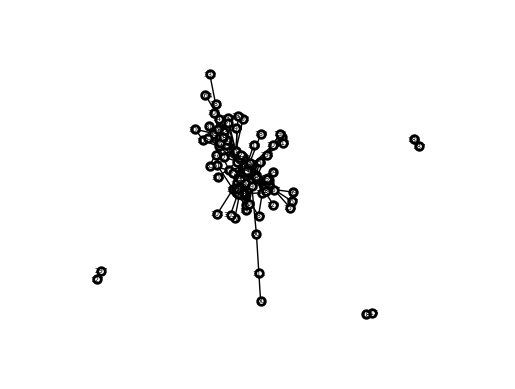

In [60]:
g=nx.from_pandas_edgelist(full_dataframe)
options = {
    "font_size": 5,
    "node_size": 30,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 1,
}
nx.draw_networkx(g, pos=nx.spring_layout(g), **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
#nx.draw(g,pos=nx.spring_layout(g))
full_dataframe.to_csv('cortona_graph_test.csv', index=False) 

[(61, 49, 'Indian Administrative Service'), (61, 11, 'Auroville'), (79, 13, 'Department of History, University of Victoria'), (33, 15, 'Birbeck College'), (80, 1, 'ETH Zürich'), (80, 1, 'ETH Zürich'), (80, 50, 'Komission für interdiziplinäre Veranstaltungen, ETH Zürich'), (74, 18, 'Lindisfarne Fellows'), (74, 19, 'World Future Society'), (74, 51, 'Costeau Society'), (74, 52, 'Futures Research Quarterly'), (74, 53, 'U.S. Congres office of Technology Assessment'), (74, 54, 'National Academy of Engineering'), (74, 55, 'National Science Foundation'), (81, 18, 'Lindisfarne Fellows'), (82, 21, 'Sandoz'), (75, 22, 'Spiritualist Association Of Great Britain'), (76, 57, 'International Institute for Bioenergetic Analysis'), (84, 1, 'ETH Zürich'), (84, 26, 'Departement Umweltnaturwissenschaften der ETH Zürich'), (51, 27, 'Tassajara Zen Mountain Center '), (51, 58, 'Buddhists concerned for Animals'), (34, 25, 'Kloster Mount Saviour'), (34, 18, 'Lindisfarne Fellows'), (87, 18, 'Lindisfarne Fellows'

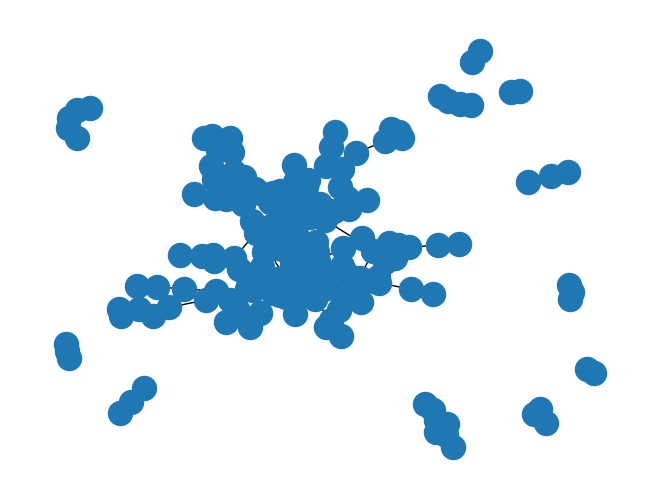

In [69]:
### look at organizations

panda_data_pursuit=pd.DataFrame(data_pursuit, columns=['source',  'target','target_name'])
print(data_pursuit)
panda_data_pursuit=panda_data_pursuit[panda_data_pursuit['target'].notna()]
#panda_data_pursuit=panda_data_pursuit.astype('int')
print(panda_data_pursuit)
g=nx.from_pandas_edgelist(panda_data_pursuit)
nx.draw(g)
panda_data_pursuit.to_csv('cortona_graph_organizations.csv', index=False) 


In [83]:
panda_data_study=pd.DataFrame(data_study, columns=['pk_person',  'pk_organization','name'])
panda_data_study=pd.DataFrame(data_study, columns=['source',  'target', 'target_name'])
panda_data_study['target']=1
panda_data_pursuit['target']=2
print(panda_data_study)
print(panda_data_pursuit)
panda_data_all_pursuit_study_organization=pd.concat([panda_data_study, panda_data_pursuit])
#nx.draw(g)
panda_data_all_pursuit_study_organization.to_csv('cortona_graph_all_organizations.csv', index=False) 

    source  target                                 target_name
0       79       1                    Johns Hopkins University
1       33       1          University of California, Berkeley
2       80       1                           Universität Basel
3       81       1  Zoologisches Museum der Universität Zürich
4       82       1                          Universität Zürich
..     ...     ...                                         ...
91     326       1                      Universität Heidelberg
92     325       1                          Universität Zürich
93     327       1   Nationala Autonomous University of Mexico
94     330       1                                  ETH Zürich
95     332       1                        Rochester University

[96 rows x 3 columns]
     source  target                                        target_name
0        61       2                      Indian Administrative Service
1        61       2                                          Auroville
2       